In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_table("./data/glove.6B.100d.txt", delimiter=" ", header=None, index_col=0, quoting=3)

In [6]:
words = set(df.index)

In [7]:
"down-to-earth" in words

True

In [63]:
whatever = ["happy", "sad", 
            "rich", "poor", 
            "important", "unimportant",
            "good", "bad", "evil", 
            "healthy", "ill", 
            "high", "low", "up", "down", 
            "conscious", "unconscious",
#            "rational", "emotional",
            "more", "less",
 #          "idealistic", "down-to-earth", "practical",
           "unknown", "known",
           "finished", "incomplete", "complete",
           "positive", "negative", 
           "big", "small", "little", "enormous",
           "beginning", "end",
           "future", "past",
           "spirit", "body",
 #          "sky", "ground",
#           "heavenly", "hell", "salvation",
           "virtuous", "sinful", 
#           "central", "peripheral",
#           "urban", "rural",
           "active", "passive",
           "hot", "cold", 
           "loud", "quiet",
 #          "expensive", "cheap", "costly",
            "normal", "eccentric", "strange",
            "front", "back",
            "on", "off"
           ]

In [64]:
df.loc[whatever].dot(df.loc["up"] - df.loc["down"])#.sort_values()

0
happy          2.210839
sad            0.269184
rich           3.374602
poor          -0.317939
important      3.172451
unimportant   -0.633256
good           2.917126
bad           -0.051883
evil          -0.618274
healthy        3.173967
ill           -0.243862
high           0.743250
low           -0.604009
up             2.651839
down          -3.158675
conscious      1.179391
unconscious   -2.804720
more           4.959796
less           3.148310
unknown       -0.736454
known          2.068978
finished       0.652012
incomplete    -0.689389
complete       3.036134
positive       2.427445
negative       1.124187
big            2.427110
small          2.593633
little         2.521163
enormous       2.970337
beginning      1.532199
end            0.706158
future         2.877336
past           0.354227
spirit         2.181550
body           0.370373
virtuous       1.299056
sinful        -0.988711
active         3.013572
passive        0.365234
hot            1.574116
cold          

In [32]:
lens = (df**2).sum(axis=1).sort_values()
dfn = df.div(np.sqrt(lens), axis='index')

/home/julia/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4256: RuntimeWarning: unorderable types: str() > float(), sort order is undefined for incomparable objects
  return_indexers=True)


In [65]:
dfn.loc[whatever].dot(dfn.loc["up"] - dfn.loc["down"])#.sort_values()

0
happy          0.074644
sad            0.010002
rich           0.103850
poor          -0.005705
important      0.100136
unimportant   -0.024927
good           0.090748
bad            0.002651
evil          -0.016135
healthy        0.099547
ill           -0.005096
high           0.025934
low           -0.013088
up             0.084013
down          -0.084013
conscious      0.043475
unconscious   -0.088271
more           0.139915
less           0.099827
unknown       -0.022282
known          0.070686
finished       0.023485
incomplete    -0.021430
complete       0.101670
positive       0.072995
negative       0.035278
big            0.078409
small          0.081515
little         0.082933
enormous       0.102733
beginning      0.057090
end            0.027565
future         0.097229
past           0.016694
spirit         0.071328
body           0.014393
virtuous       0.050086
sinful        -0.036823
active         0.102046
passive        0.014247
hot            0.049474
cold          

In [66]:
height = df.loc["up"] - df.loc["down"]
second = df.loc["good"] - df.loc["bad"]
proj = pd.DataFrame([height, second], index=["height", "second"]).transpose()

In [67]:
df_plot = df.loc[whatever].dot(proj)
df_plot["name"] = df_plot.index

In [46]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


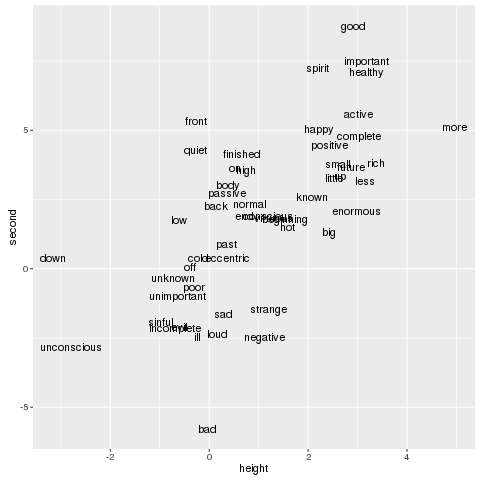

In [68]:
%%R -i df_plot
library(ggplot2)

ggplot(df_plot, aes(height, second, label=name)) +
  geom_text()